In [26]:
import numpy as np                                   #to o find the minimum argument of a list 
import math                                          #for defining our functions
import random                                        #it will be used for sampling
from matplotlib import pyplot as plt                 # help visualize our results 
from IPython.display import clear_output
import pandas as pd
import scipy.stats as stats
PI = 3.1415926
e = 2.71828 


# (defining the function)

In [27]:
# lets also define the function we want to calculate  over f(x)

def f_of_x(w,h,t,epsilon_r):
    aa=((epsilon_r+1)/2)
    bb=((epsilon_r-1)/2)
    cc=1/(math.sqrt(1+((12*h)/w)))

    if w<h:
        epsilon_effect=aa+(bb*(cc+(0.04*((1-(w/h))**2)))) #if w<h
    else:
        epsilon_effect=aa+(bb*cc) # else    
    
    
    a=((t/h)**2)
    b=(((1/PI)/((w/t)+1.1))**2)
    delta_w=t/PI* np.log((4*e)/(a+b))
    delta_w_prime=delta_w*((1+(1/epsilon_effect))/2)
    w_prime=w+delta_w_prime
    dd= (120*PI)/((2.0)*(math.sqrt(2.0))*(PI)*(math.sqrt(epsilon_r+1.0)))
    ee=((14.0+(8.0/epsilon_effect))/11.0)*((4.0*h)/w_prime)
    ff=(((14.0+(8.0/epsilon_effect))/11.0)**2.0)*((4.0*h/w_prime)**2.0)
    gg=(PI**2)*((1.0+(1.0/epsilon_effect))/2.0)
    hh=math.sqrt(ff+gg)
    ii=((4.0*h)/w_prime)*(ee+hh)
    z=dd*np.log(1.0+ii)
    zz=round(z, 2)
   
    return zz+.73  # compensate the difference of the formular between (website and masterthesis)



In [28]:
print(f_of_x(0.246,0.150,0.050,4.53))

50.0


# (Generating random number in  a particular range )

In [29]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

# Crude Monte Carlo


In [30]:
def crude_monte_carlo( w_primary= 0.246,h_primary=0.150,t_primary=0.050,epsilon_r_primary= 4.53,num_samples=4000):
    
    y_probability=[]
    sum_of_samples = 0
    for i in range(num_samples):
        epsilon_r = get_rand_number(epsilon_r_primary-0.31, epsilon_r_primary-0.31)
        w = get_rand_number( w_primary-0.030, w_primary+0.030)
        t = get_rand_number(t_primary-0.020, t_primary+0.020)
        h = get_rand_number(h_primary-0.030, h_primary+0.030)
        sum_of_samples += f_of_x(w,h,t,epsilon_r)
        y_probability.append( f_of_x(w,h,t,epsilon_r))
        Z_montacarlo=round(sum_of_samples/num_samples, 2)
        
    return  float(Z_montacarlo),y_probability

# Test the algorithm

In [31]:
crude_estimation = crude_monte_carlo(0.246,0.150,0.050,4.53,50000)
y_probability=crude_estimation[1]
print(f"Monte Carlo Approximation of f(x): {crude_estimation[0]}")
print(f"the length of produced output array = {len(y_probability)} items")

Monte Carlo Approximation of f(x): 51.53
the length of produced output array = 50000 items


In [32]:
print(y_probability[1:4])

[49.279999999999994, 53.769999999999996, 48.779999999999994]


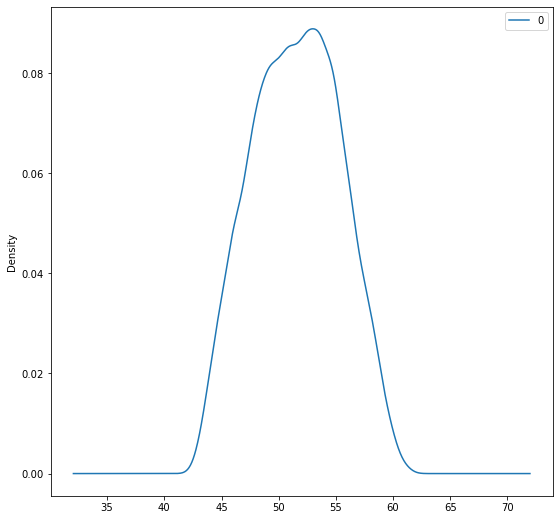

In [34]:
pd.DataFrame(y_probability).plot(kind="density",figsize=(9,9)); # Plot the distribution


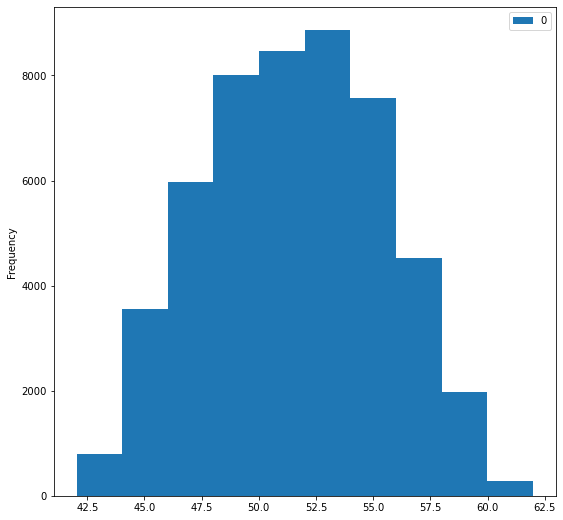

In [35]:
pd.DataFrame(y_probability).plot.hist(figsize=(9,9)); # Plot the distribution


<AxesSubplot:ylabel='Frequency'>

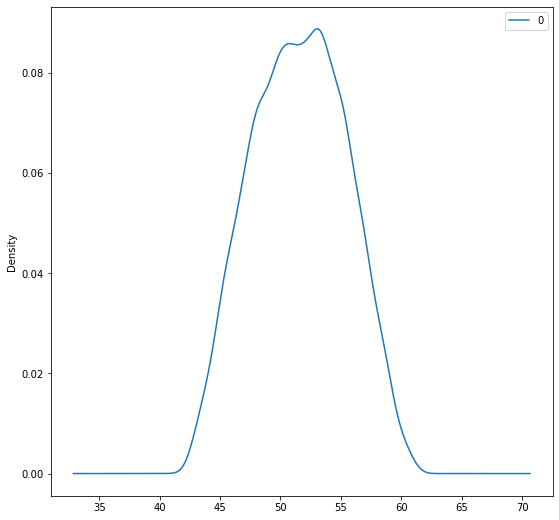

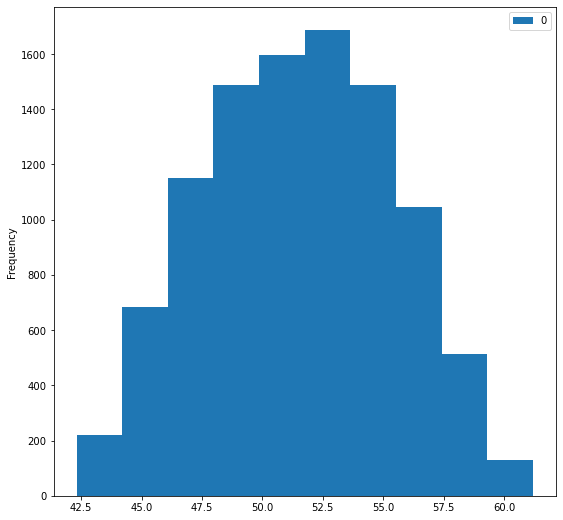

In [19]:
pd.DataFrame(y_probability).plot(kind="density",figsize=(9,9))
pd.DataFrame(y_probability).plot.hist(figsize=(9,9))
#df["Test_1"].plot.hist(normed=True) # Histogram will now be normalized

## from website (https://chemandy.com/calculators/microstrip-transmission-line-calculator.htm)

In [3]:
epsilon_r=4.53 # Relative Dielectric Constant ( εr ):
w=0.276 # Track Width
t=0.050# Track Thickness
h=0.150  # Dielectric Thickness

aa=((epsilon_r+1)/2)
bb=((epsilon_r-1)/2)
cc=1/(math.sqrt(1+((12*h)/w)))

if w<h:
    epsilon_effect=aa+(bb*(cc+(0.04*((1-(w/h))**2)))) #if w<h
else:
    epsilon_effect=aa+(bb*cc) # else    
    
    
a=((t/h)**2)
b=(((1/PI)/((w/t)+1.1))**2)
delta_w=t/PI* np.log((4*e)/(a+b))
delta_w_prime=delta_w*((1+(1/epsilon_effect))/2)
w_prime=w+delta_w_prime
dd= (120*PI)/((2.0)*(math.sqrt(2.0))*(PI)*(math.sqrt(epsilon_r+1.0)))
ee=((14.0+(8.0/epsilon_effect))/11.0)*((4.0*h)/w_prime)
ff=(((14.0+(8.0/epsilon_effect))/11.0)**2.0)*((4.0*h/w_prime)**2.0)
gg=(PI**2)*((1.0+(1.0/epsilon_effect))/2.0)
hh=math.sqrt(ff+gg)
ii=((4.0*h)/w_prime)*(ee+hh)
z=dd*np.log(1.0+ii)

print(delta_w)
print(delta_w_prime)
print(epsilon_effect)
print(round(z, 2)) # rounding the nimbers to two digits after comma


0.07262119157889464
0.04696337893431332
3.408554862674253
46.39


In [4]:
A=[1,55,33,4,6,7,9]
B=[]
for i in range(0,len(A)):
    f=2+A[i]
    B.append(f)
print(B)

[3, 57, 35, 6, 8, 9, 11]


# (Generating random number in  a particular range )

In [7]:
# lets also define the function we want to calculate  over f(x)

def f_of_x(epsilon_r,w,t,h):
    aa=((epsilon_r+1)/2)
    bb=((epsilon_r-1)/2)
    cc=1/(math.sqrt(1+((12*h)/w)))

    if w<h:
        epsilon_effect=aa+(bb*(cc+(0.04*((1-(w/h))**2)))) #if w<h
    else:
        epsilon_effect=aa+(bb*cc) # else    
    
    
    a=((t/h)**2)
    b=(((1/PI)/((w/t)+1.1))**2)
    delta_w=t/PI* np.log((4*e)/(a+b))
    delta_w_prime=delta_w*((1+(1/epsilon_effect))/2)
    w_prime=w+delta_w_prime
    dd= (120*PI)/((2.0)*(math.sqrt(2.0))*(PI)*(math.sqrt(epsilon_r+1.0)))
    ee=((14.0+(8.0/epsilon_effect))/11.0)*((4.0*h)/w_prime)
    ff=(((14.0+(8.0/epsilon_effect))/11.0)**2.0)*((4.0*h/w_prime)**2.0)
    gg=(PI**2)*((1.0+(1.0/epsilon_effect))/2.0)
    hh=math.sqrt(ff+gg)
    ii=((4.0*h)/w_prime)*(ee+hh)
    z=dd*np.log(1.0+ii)
    zz=round(z, 2)
   
    return zz



In [5]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1
    return min_value + range*choice

In [10]:
# play************
y111=[]
for i in range(10):
    y111.append(get_rand_number(1,6))
print(y111)


[5.373437665461037, 4.559696677530899, 5.462969942847208, 5.322556637329063, 2.0104506546283725, 5.996141213861152, 2.0476855823623366, 5.3086032552683085, 5.388990085860963, 1.2566280503127145]


In [11]:
# lets also define the function we want to calculate  over f(x)

def f_of_x(x,z):
    """
    This is the main function we want to calculate  over duration.
    Args:
    - x (float), z(float) : input to function; 
    Return:
    - output of function f(x) (float)
    """
    return (5*x)+(2*z)+5 



# Crude Monte Carlo


In [12]:
def crude_monte_carlo(num_samples=5000):
    """
    This function performs the Crude Monte Carlo for our
   
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    - range  of variables
    """
    lower_bound = 0
    upper_bound = 4
    y_probability=[]
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound)
        z = get_rand_number(lower_bound, upper_bound)
        sum_of_samples += f_of_x(x,z)
        y_probability.append(f_of_x(x,z))
        
    return  float(sum_of_samples/num_samples),y_probability

# Test the algorithm

In [26]:
crude_estimation = crude_monte_carlo(1000)
y_probability=crude_estimation[1]
print(f"Monte Carlo Approximation of f(x): {crude_estimation[0]}")
print(f"the length of produced output array = {len(y_probability)} items")


Monte Carlo Approximation of f(x): 19.17030956032332
the length of produced output array = 1000 items


In [38]:
print(y_probability[1:4])

[12.315988272255009, 23.51257408113904, 23.651522532637006]


# probability distribution of the produced array

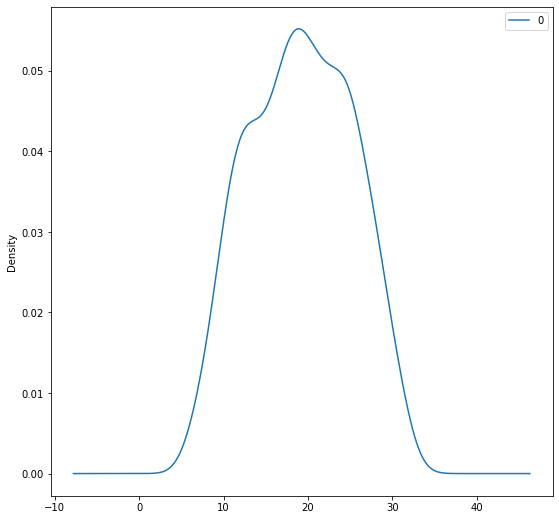

In [47]:
pd.DataFrame(y_probability).plot(kind="density",figsize=(9,9)); # Plot the distribution
                              